# WoZ TaskMAD Experiment Analysis

This notebook analyses knowledge-grounded cooking conversations gathered in a WoZ experiment using the TaskMAD framework. We aim to answer the following questions:
1. How many information nuggets were transferred in conversations?
2. Are there differences in active/passive conditions?
3. Are there differences between various age groups?
4. How many information nuggets are conveyed in response to different information needs?
5. Which information sources were used to satisfy various information needs?
6. How long are user/agent utterances?
7. How long are the conversations?

In [687]:
# We first import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Markdown as md
from sklearn.metrics import accuracy_score
plt.style.use('ggplot') 
import seaborn as sns
import scipy.stats as stats
import researchpy as rp
import scikit_posthocs as sp

And then proceed to import the annotated information nugget file we use to compute all the stats in our paper...

In [747]:
info_nuggets = pd.read_csv("data_nugget_analysis/woz_data_analysis_files/annotations_info_nugget_final.tsv", delimiter="\t")
#info_nuggets['age_group'] = np.where((info_nuggets['age']=='45-54')|(info_nuggets['age']=='55-64'), '45 or older','younger than 45') 
info_nuggets.head(5)

,id,utterance,conv_id,age,gender,condition,gpt_3_nugget_count,chat_gpt_nugget_count,chat_gpt_explanation,age_group
0,-NGusXPorNbKoO2IAC6F,Glass is important because it determines the r...,cegcgsG,55-64,female,active,3,3,3,45 or older
1,-NGWZQuXZ169LLcuMXrt,So this is the process of maceration I told yo...,rfAHhxd,65-74,male,active,0,3,3,younger than 45
2,-NGvd8ZKH9ZuNcrqgBuX,"I cannot tell you an exact temperature, but hi...",tLrorpH,55-64,female,active,2,2,Two,45 or older
3,-NKneWlmmI9gmW3Q97ER,Are you planning to use an electric hand blender?,2424a396,45-54,female,active,0,1,NaN,45 or older
4,-NGvkOLA_8fFuUYMSGdZ,A whisking method by a famous French chef is t...,tLrorpH,55-64,female,active,1,1,1 (one),45 or older


In [748]:
print(f"In total, there are {len(info_nuggets)} agent utterances. {len(info_nuggets[info_nuggets['gpt_3_nugget_count']!=0])} utterances contain information nuggets.")

In total, there are 1382 agent utterances. 309 utterances contain information nuggets.


**How many agent utterances are in the active/passive condition?**

In [749]:
info_nuggets['condition'].value_counts()

active     993
passive    389
Name: condition, dtype: int64

**How old are our participants?**

In [750]:
info_nuggets.groupby('conv_id')['age'].first().value_counts()

45-54    16
25-34    10
35-44     9
18-24     5
55-64     5
65-74     3
Name: age, dtype: int64

In [751]:
info_nuggets.groupby('conv_id')['age'].first().value_counts(normalize=True)*100

45-54    33.333333
25-34    20.833333
35-44    18.750000
18-24    10.416667
55-64    10.416667
65-74     6.250000
Name: age, dtype: float64

**Which gender do they have?**

In [752]:
info_nuggets.groupby('conv_id')['gender'].first().value_counts(normalize=True)*100

female        64.583333
male          33.333333
non-binary     2.083333
Name: gender, dtype: float64

## 1. How many information nuggets are transferred in conversations?

We group agent utterances by conversation and condition...

In [753]:
condition_conv_group = info_nuggets.groupby(['condition','conv_id']).sum()

<AxesSubplot: title={'center': 'gpt_3_nugget_count'}, xlabel='condition'>

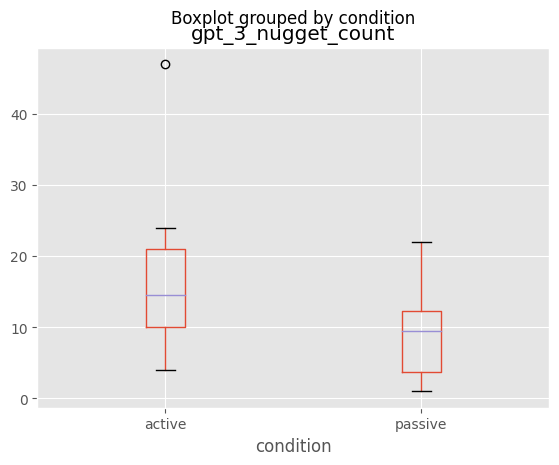

In [754]:
condition_conv_group.boxplot(column="gpt_3_nugget_count", by="condition")

In [755]:
print("Active condition nugget counts")
condition_conv_group.groupby('condition').get_group('active').describe()

Active condition nugget counts


,gpt_3_nugget_count,chat_gpt_nugget_count
count,24.000000,24.000000
mean,15.875000,42.625000
std,9.008752,15.942321
min,4.000000,19.000000
25%,10.000000,29.250000
50%,14.500000,43.500000
75%,21.000000,53.500000
max,47.000000,74.000000


In [756]:
print("Passive condition nugget counts")
condition_conv_group.groupby('condition').get_group('passive').describe()

Passive condition nugget counts


,gpt_3_nugget_count,chat_gpt_nugget_count
count,24.00000,24.000000
mean,9.12500,18.791667
std,6.20177,9.245347
min,1.00000,5.000000
25%,3.75000,11.250000
50%,9.50000,18.500000
75%,12.25000,25.000000
max,22.00000,34.000000


## 2. Is the amount of info. nuggets transferred significantly different across conditions?

In [757]:
stats.mannwhitneyu(condition_conv_group.groupby('condition').get_group('active')["gpt_3_nugget_count"], 
                condition_conv_group.groupby('condition').get_group('passive')["gpt_3_nugget_count"])


MannwhitneyuResult(statistic=144.5, pvalue=0.0015725818155318504)

## 3. Are there differences between age groups?

In [758]:
condition_conv_age_group = info_nuggets.groupby(['condition','age_group','conv_id']).sum()
condition_conv_age_group

gpt_3_nugget_count  \
condition age_group       conv_id                                        
active    45 or older     2424a396                                   8   
                          57272517e386b9000e3e2b72                   5   
                          5ea196f089935b04d2ee69d9                  18   
                          612517df29cd32c6632b4a44                  21   
                          ABFwuoU                                   20   
                          a9780bf6                                   6   
                          c70f521                                    8   
                          cegcgsG                                   21   
                          ea5def48                                  12   
                          ozf8rdojjw                                10   
                          tLrorpH                                   47   
          younger than 45 1vNO49Y                                   14   
                          4f7f5758                                   4   
                          5e45a7e926e79c000bc12a85                  21   
                          5ed91d3f31d9c60a8ac27018                  11   
                          8nJXjVjBTQ                                24   
                          INfBowH                                   10   
                          XYjHSL2Ky3                                13   
                          eiRY3df7Aq                                18   
                          j6iz4akqr2                                13   
                          o9UbVjHVrS                                24   
                          rEG2v4CE7m                                15   
                          rfAHhxd                                   23   
                          v684ge8cmo                                15   
passive   45 or older     5c8d1bee1bb19f00019d519e                   6   
                          7460a2a0                                  20   
                          Fxikuau                                   13   
                          KlOmIXe                                   11   
                          LFiNVaQ                                   18   
                          PPmiUbC                                   12   
                          nRHLDUQ                                   11   
                          pC0jYVl                                    4   
                          sVzhG                                     13   
                          xMKcudn                                    8   
          younger than 45 2b71cb60                                   2   
                          55b3120cfdf99b6ef6263a71                   9   
                          577c065c9fecfe0001a5bcc7                   2   
                          5fdbb3b4e66d7f061f78ea21                   1   
                          608b0f7f4699c09aa348c57f                  22   
                          60c48655811ab33a8f77dd34                  10   
                          68942e2a                                   3   
                          EioCaKa                                    5   
                          bKBDfgUAa3                                 2   
                          coe2XtNapn                                10   
                          h8x8QLzyCx                                11   
                          mmhHDA6eue                                 4   
                          qk8kmns74p                                 3   
                          tcYis3RLgY                                19   

                                                    chat_gpt_nugget_count  
condition age_group       conv_id                                          
active    45 or older     2424a396                                     19  
                          57272517e386b9000e3e2b72                     21  
                          5ea196f089935b04d2ee6

In [759]:
condition_conv_age_group.groupby(['age_group'])['gpt_3_nugget_count'].describe()

,count,mean,std,min,25%,50%,75%,max
age_group,,,,,,,,
45 or older,21.0,13.904762,9.358978,4.0,8.0,12.0,18.0,47.0
younger than 45,27.0,11.407407,7.525645,1.0,4.0,11.0,16.5,24.0


In [760]:
condition_conv_age_group.groupby(['condition','age_group'])['gpt_3_nugget_count'].describe()

count       mean        std  min    25%   50%  \
condition age_group                                                        
active    45 or older       11.0  16.000000  11.966620  5.0   8.00  12.0   
          younger than 45   13.0  15.769231   6.016004  4.0  13.00  15.0   
passive   45 or older       10.0  11.600000   4.926121  4.0   8.75  11.5   
          younger than 45   14.0   7.357143   6.570413  1.0   2.25   4.5   

                            75%   max  
condition age_group                    
active    45 or older      20.5  47.0  
          younger than 45  21.0  24.0  
passive   45 or older      13.0  20.0  
          younger than 45  10.0  22.0

<AxesSubplot: title={'center': 'gpt_3_nugget_count'}, xlabel='age_group'>

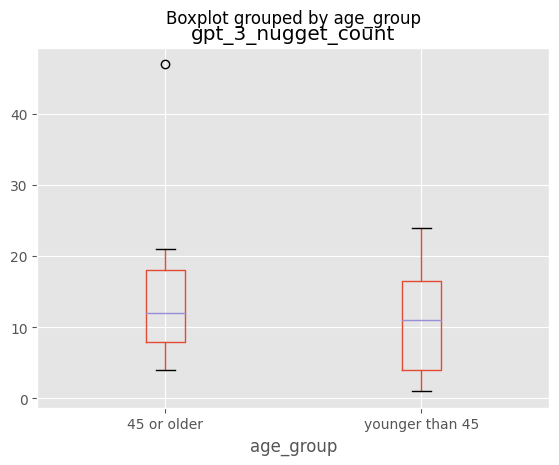

In [761]:
condition_conv_age_group.boxplot(column="gpt_3_nugget_count", by="age_group")

In [762]:
age_posthoc = sp.posthoc_ttest(info_nuggets,
                                 val_col='gpt_3_nugget_count',
                                 group_col='age',
                                 p_adjust='bonferroni')
age_posthoc

,55-64,65-74,45-54,35-44,25-34,18-24
55-64,1.000000,0.729519,1.000000,1.0,1.0,1.0
65-74,0.729519,1.000000,0.860455,1.0,1.0,1.0
45-54,1.000000,0.860455,1.000000,1.0,1.0,1.0
35-44,1.000000,1.000000,1.000000,1.0,1.0,1.0
25-34,1.000000,1.000000,1.000000,1.0,1.0,1.0
18-24,1.000000,1.000000,1.000000,1.0,1.0,1.0


In [763]:
condition_posthoc = sp.posthoc_ttest(info_nuggets,
                                     val_col='gpt_3_nugget_count',
                                     group_col='age_group',
                                     p_adjust='bonferroni')
condition_posthoc

,45 or older,younger than 45
45 or older,1.000000,0.053579
younger than 45,0.053579,1.000000


In [764]:
stats.mannwhitneyu(condition_conv_age_group.groupby('age_group').get_group('45 or older')["gpt_3_nugget_count"], 
                condition_conv_age_group.groupby('age_group').get_group('younger than 45')["gpt_3_nugget_count"])


MannwhitneyuResult(statistic=248.0, pvalue=0.23314742469983363)

In [765]:
stats.mannwhitneyu(condition_conv_age_group.groupby(['condition','age_group']).get_group(('active', '45 or older'))["gpt_3_nugget_count"], 
                condition_conv_age_group.groupby(['condition','age_group']).get_group(('active', 'younger than 45'))["gpt_3_nugget_count"])


MannwhitneyuResult(statistic=58.0, pvalue=0.2251791581349581)

In [766]:
stats.mannwhitneyu(condition_conv_age_group.groupby(['condition','age_group']).get_group(('passive', '45 or older'))["gpt_3_nugget_count"], 
                condition_conv_age_group.groupby(['condition','age_group']).get_group(('passive', 'younger than 45'))["gpt_3_nugget_count"])


MannwhitneyuResult(statistic=33.5, pvalue=0.017280504334956044)

The age group analysis revealed that overall there are no significant differences. However, in passive conversations, more information nuggets are conveyed for people `>45` (`p<.05`).

## 4. How many information nuggets are communicated in response to different information needs?

### 4.1 Calculate the amount of information needs in user utterances

**Step 1**: Import the file that contains the parent ids and the associated information needs.

In [789]:
def add_high_level_info_need_type(info_need_type):
    if info_need_type == "knowledge":
        return "knowledge"
    elif pd.isna(info_need_type):        
        return None
    elif info_need_type.strip()=='':
        return None
    else:
        return "process"

In [850]:
info_nuggets_parent_children = pd.read_csv("data_nugget_analysis/woz_data_analysis_files/final_info_nuggets_parent_children.tsv",
                                          delimiter="\t", index_col=False, dtype={'stack_excahnge':int})
info_nuggets_parent_children['overall_info_need_type'] = info_nuggets_parent_children['parent_info_need'].map(add_high_level_info_need_type)
info_nuggets_parent_children['parent_info_need_subtype'] = info_nuggets_parent_children['parent_info_need_subtype'].replace('science_knowledge','science')
info_nuggets_parent_children.head(5)                                         

,conversation_id,condition,participant_gender,participant_age,utterance_id,parent_id,parent_info_need,parent_info_need_subtype,parent_text,utterance_text,...,info_need_subtype,nugget_1,nugget_2,nugget_3,excel_how_to,excel_recipe,wikipedia,serious_eats,stack_excahnge,overall_info_need_type
0,o9UbVjHVrS,active,female,25-34,-NBM4Po72yJo9OVy-leY,,,,,Hey there! Happy to have you on board for our ...,...,NaN,0,3,3,0,0,0,0,0,None
1,o9UbVjHVrS,active,female,25-34,-NBM4Vc_a2KIh2KpZR27,,,,,Hello. How can I help you? :),...,NaN,0,0,0. There are no factual statements or informat...,0,0,0,0,0,None
2,o9UbVjHVrS,active,female,25-34,-NBM4ihrwHLmCiybGdRW,-NBM4d-O2nP6qoZ2zi-G,preparation,NaN,"ok, what's the first step?",I'll show you,...,NaN,0,0,0,0,0,0,0,0,process
3,o9UbVjHVrS,active,female,25-34,-NBM4qPJT1_OQMboWpmm,-NBM4d-O2nP6qoZ2zi-G,preparation,NaN,"ok, what's the first step?",Do you see it already?,...,NaN,0,0,0 (There are no facts stated in this text. It ...,0,0,0,0,0,process
4,o9UbVjHVrS,active,female,25-34,-NBM4yU-HWgg2zpxsoey,-NBM4uO8I7-lL_ppa5pr,NaN,NaN,I don't see anything? sorry,Alright so this is what you need to do first:C...,...,NaN,0,1,There is only one fact in the text: the ingred...,0,1,0,0,0,None


In [851]:
from scipy.stats import chi2_contingency


In [852]:
chi2_test_table = info_nuggets_parent_children[info_nuggets_parent_children["overall_info_need_type"].notnull()]

In [853]:
# Create a contingency table of frequencies
cont_table = pd.crosstab(chi2_test_table['condition'], chi2_test_table['overall_info_need_type'])

# Perform the chi-square test of independence
chi2, pval, dof, exp_freq = chi2_contingency(cont_table)
chi2, pval

(21.35779538523764, 3.810681199515849e-06)

In [854]:
cont_table

overall_info_need_type,knowledge,process
condition,,
active,223,295
passive,83,227


In [855]:
active_data = {'amount': 11,
 'cooking_technique': 25,
 'equipment': 18,
 'ingredient': 45,
 'knowledge': 117,
 'meal': 3,
 'preparation': 60,
 'recipe': 7,
 'temperature': 7,
 'time': 16}

passive_data = {'amount': 10,
 'cooking_technique': 16,
 'equipment': 13,
 'ingredient': 40,
 'knowledge': 53,
 'meal': 7,
 'misc': 2,
 'preparation': 47,
 'recipe': 6,
 'temperature': 2,
 'time': 15}

knowledge_active_data = {'equipment': 6,
 'history': 20,
 'image': 1,
 'ingredient': 7,
 'picture': 1,
 'recipe': 1,
 'science': 40,
 'step_importance': 41,
 'temperature': 1,
 'time': 1,
 'video': 8,
 'visual': 1}

knowledge_passive_data = {'equipment': 4,
 'history': 21,
 'image': 7,
 'picture': 5,
 'recipe': 1,
 'science': 8,
 'step_importance': 19,
 'video': 14,
 'visual': 2}

In [856]:
active_info_need_counts = pd.DataFrame(list(active_data.items()), columns=['info_need', 'count'])
active_info_need_counts['overall_info_need_type'] = active_info_need_counts['info_need'].map(add_high_level_info_need_type)
active_info_need_counts


,info_need,count,overall_info_need_type
0,amount,11,process
1,cooking_technique,25,process
2,equipment,18,process
3,ingredient,45,process
4,knowledge,117,knowledge
5,meal,3,process
6,preparation,60,process
7,recipe,7,process
8,temperature,7,process
9,time,16,process


In [857]:
passive_info_need_counts = pd.DataFrame(list(passive_data.items()), columns=['info_need', 'count'])
passive_info_need_counts['overall_info_need_type'] = passive_info_need_counts['info_need'].map(add_high_level_info_need_type)
passive_info_need_counts


,info_need,count,overall_info_need_type
0,amount,10,process
1,cooking_technique,16,process
2,equipment,13,process
3,ingredient,40,process
4,knowledge,53,knowledge
5,meal,7,process
6,misc,2,process
7,preparation,47,process
8,recipe,6,process
9,temperature,2,process


### 4.2 Count distribution for Knowledge/Process Needs

**Number of knowledge/proccess needs for active condition**

In [858]:
def create_count_percentage(df, info_need_column):
    # group the dataframe by overall_info_need_type and sum the count column
    count_by_type = df.groupby(info_need_column)['count'].sum()

    # calculate the percentages
    total_count = count_by_type.sum()
    percentage_by_type = (count_by_type / total_count) * 100
    return count_by_type, percentage_by_type

In [859]:
active_result = pd.DataFrame({'Counts': create_count_percentage(active_info_need_counts, 'overall_info_need_type')[0], 'Percentages': create_count_percentage(active_info_need_counts, 'overall_info_need_type')[1]})
active_result

,Counts,Percentages
overall_info_need_type,,
knowledge,117,37.864078
process,192,62.135922


**Number of knowledge/proccess needs for passive condition**

In [860]:
passive_result = pd.DataFrame({'Counts': create_count_percentage(passive_info_need_counts, 'overall_info_need_type')[0], 'Percentages': create_count_percentage(passive_info_need_counts, 'overall_info_need_type')[1]})
passive_result

,Counts,Percentages
overall_info_need_type,,
knowledge,53,25.118483
process,158,74.881517


In [861]:
overall_cross_tab = pd.concat([active_result['Counts'], passive_result['Counts']], axis=1, keys=['active', 'passive'])

# Perform the chi-square test of independence
chi2, pval, dof, exp_freq = chi2_contingency(overall_cross_tab, correction=True)
chi2, pval, dof, exp_freq

(8.686347589235845,
 0.0032060244373923324,
 1,
 array([[101.01923077,  68.98076923],
        [207.98076923, 142.01923077]]))

In [862]:
def chi_square_posthoc(df):
    print(f"Bonferroni-adjusted alpha is {0.05/len(df.index)}")
    for var in df.index:
        obs = df.loc[var]
        chi2, pval, dof, expected = chi2_contingency([obs, [df['active'].sum() - obs['active'], df['passive'].sum() - obs['passive']]])
        print(f'{var.capitalize()}: Chi-square = {chi2:.2f}, p-value = {pval:.4f}')

In [863]:
chi_square_posthoc(overall_cross_tab)

Bonferroni-adjusted alpha is 0.025
Knowledge: Chi-square = 8.69, p-value = 0.0032
Process: Chi-square = 8.69, p-value = 0.0032


### 4.3 Calculate number/percentage of needs split by process/knowledge

**Prepare data...**

In [864]:
active_knowledge = pd.DataFrame(list(knowledge_active_data.items()), columns=['info_need', 'count'])
active_process = active_info_need_counts[active_info_need_counts['overall_info_need_type']=='process']
passive_knowledge = pd.DataFrame(list(knowledge_passive_data.items()), columns=['info_need', 'count'])
passive_process = passive_info_need_counts[passive_info_need_counts['overall_info_need_type']=='process']

#### 4.3.1 Calculate Distribution of Process Needs

**Active Conversation** *process needs*

In [865]:
active_process_result = pd.DataFrame({'Counts': create_count_percentage(active_process, 'info_need')[0], 'Percentages': create_count_percentage(active_process, 'info_need')[1]})
active_process_result

,Counts,Percentages
info_need,,
amount,11,5.729167
cooking_technique,25,13.020833
equipment,18,9.375000
ingredient,45,23.437500
meal,3,1.562500
preparation,60,31.250000
recipe,7,3.645833
temperature,7,3.645833
time,16,8.333333


**Passive Conversation** *process needs*

In [866]:
passive_process_result = pd.DataFrame({'Counts': create_count_percentage(passive_process, 'info_need')[0], 'Percentages': create_count_percentage(passive_process, 'info_need')[1]})
passive_process_result

,Counts,Percentages
info_need,,
amount,10,6.329114
cooking_technique,16,10.126582
equipment,13,8.227848
ingredient,40,25.316456
meal,7,4.430380
misc,2,1.265823
preparation,47,29.746835
recipe,6,3.797468
temperature,2,1.265823


#### 4.3.2 Calculate distribution of Knowledge Needs

**Active Conversation** *knowledge needs*

In [867]:
active_knowledge_result = pd.DataFrame({'Counts': create_count_percentage(active_knowledge, 'info_need')[0], 'Percentages': create_count_percentage(active_knowledge, 'info_need')[1]}).reset_index()
active_knowledge_result['category'] = active_knowledge_result['info_need'].apply(lambda x: x if x in ['science','history','step_importance'] else 'other')
active_knowledge_result=active_knowledge_result.groupby('category').agg({'Counts': 'sum', 'Percentages': 'sum'})
active_knowledge_result

,Counts,Percentages
category,,
history,20,15.62500
other,27,21.09375
science,40,31.25000
step_importance,41,32.03125


**Passive Conversation** *knowledge needs*

In [868]:
passive_knowledge_result = pd.DataFrame({'Counts': create_count_percentage(passive_knowledge, 'info_need')[0], 'Percentages': create_count_percentage(passive_knowledge, 'info_need')[1]}).reset_index()
passive_knowledge_result['category'] = passive_knowledge_result['info_need'].apply(lambda x: x if x in ['science','history','step_importance'] else 'other')
passive_knowledge_result=passive_knowledge_result.groupby('category').agg({'Counts': 'sum', 'Percentages': 'sum'})
passive_knowledge_result

,Counts,Percentages
category,,
history,21,25.925926
other,33,40.740741
science,8,9.876543
step_importance,19,23.456790


In [869]:
knowledge_cross_tab = pd.concat([active_knowledge_result['Counts'], passive_knowledge_result['Counts']], axis=1, keys=['active', 'passive'])
knowledge_cross_tab

,active,passive
category,,
history,20,21
other,27,33
science,40,8
step_importance,41,19


In [870]:
# Perform the chi-square test of independence
chi2, pval, dof, exp_freq = chi2_contingency(knowledge_cross_tab, correction=True)
chi2, pval

(20.491280628952122, 0.0001342528101490615)

In [871]:
chi_square_posthoc(knowledge_cross_tab)

Bonferroni-adjusted alpha is 0.0125
History: Chi-square = 2.72, p-value = 0.0993
Other: Chi-square = 8.42, p-value = 0.0037
Science: Chi-square = 11.63, p-value = 0.0006
Step_importance: Chi-square = 1.39, p-value = 0.2388


### 4.4 Calculate avg. number of information nuggets conveyed in response to user questions

We group the data by `parent_id` to calculate the average number of info nuggets contained in an **answer**.

In [872]:
knowledge_answers = info_nuggets_parent_children[info_nuggets_parent_children['overall_info_need_type']=='knowledge']
active_knowledge_answers = knowledge_answers[knowledge_answers['condition']=='active']
passive_knowledge_answers = knowledge_answers[knowledge_answers['condition']=='passive']

process_answers = info_nuggets_parent_children[info_nuggets_parent_children['overall_info_need_type']=='process']
active_process_answers = process_answers[process_answers['condition']=='active']
passive_process_answers = process_answers[process_answers['condition']=='passive']

Therefore, we first calculate the total number of nuggets for each answer (`sum()`) and then calculate the overall mean for each answer...

In [873]:
print(f"Avg. # of nuggets in KNOWLEDGE answers: {knowledge_answers.groupby('parent_id')['nugget_1'].sum().mean():.2f} -- SD: {knowledge_answers.groupby('parent_id')['nugget_1'].sum().std():.2f} ")
print(f"Avg. # of nuggets in ACTIVE KNOWLEDGE answers: {active_knowledge_answers.groupby('parent_id')['nugget_1'].sum().mean():.2f}")
print(f"Avg. # of nuggets in PASSIVE KNOWLEDGE answers: {passive_knowledge_answers.groupby('parent_id')['nugget_1'].sum().mean():.2f}")

Avg. # of nuggets in KNOWLEDGE answers: 1.58 -- SD: 1.78 
Avg. # of nuggets in ACTIVE KNOWLEDGE answers: 1.42
Avg. # of nuggets in PASSIVE KNOWLEDGE answers: 1.92


In [874]:
print(f"Avg. # of nuggets in PROCESS answers: {process_answers.groupby('parent_id')['nugget_1'].sum().mean():.2f} -- SD: {process_answers.groupby('parent_id')['nugget_1'].sum().std():.2f} ")
print(f"Avg. # of nuggets in ACTIVE PROCESS answers: {active_process_answers.groupby('parent_id')['nugget_1'].sum().mean():.2f}")
print(f"Avg. # of nuggets in PASSIVE PROCESS answers: {passive_process_answers.groupby('parent_id')['nugget_1'].sum().mean():.2f}")

Avg. # of nuggets in PROCESS answers: 0.79 -- SD: 1.39 
Avg. # of nuggets in ACTIVE PROCESS answers: 0.86
Avg. # of nuggets in PASSIVE PROCESS answers: 0.71


U-Test: Are there **sig. more info nuggets in knowledge answer**?

In [875]:
stats.mannwhitneyu(knowledge_answers.groupby('parent_id')['nugget_1'].sum(),
                   process_answers.groupby('parent_id')['nugget_1'].sum()
                  )

MannwhitneyuResult(statistic=19396.5, pvalue=2.710387482483306e-09)

**Overall avg. # of Process Subtype needs:**


In [876]:
print(f"OVERALL avg. PROCESS needs counts:")
print(process_answers.groupby(['parent_id', 'parent_info_need'])['nugget_1'].sum().groupby('parent_info_need').mean())


OVERALL avg. PROCESS needs counts:
parent_info_need
amount               0.684211
cooking_technique    1.076923
equipment            0.903226
ingredient           1.268293
meal                 1.500000
misc                 0.000000
preparation          0.157895
recipe               1.250000
temperature          1.888889
time                 0.344828
Name: nugget_1, dtype: float64


In [877]:
print(f"ACTIVE avg. PROCESS needs counts:")
print(active_process_answers.groupby(['parent_id', 'parent_info_need'])['nugget_1'].sum().groupby('parent_info_need').mean())


ACTIVE avg. PROCESS needs counts:
parent_info_need
amount               0.454545
cooking_technique    1.391304
equipment            1.388889
ingredient           1.227273
meal                 0.333333
preparation          0.180000
recipe               1.166667
temperature          1.857143
time                 0.357143
Name: nugget_1, dtype: float64


In [878]:
print(f"PASSIVE avg. PROCESS needs counts:")
print(passive_process_answers.groupby(['parent_id', 'parent_info_need'])['nugget_1'].sum().groupby('parent_info_need').mean())


PASSIVE avg. PROCESS needs counts:
parent_info_need
amount               1.000000
cooking_technique    0.625000
equipment            0.230769
ingredient           1.315789
meal                 2.000000
misc                 0.000000
preparation          0.133333
recipe               1.333333
temperature          2.000000
time                 0.333333
Name: nugget_1, dtype: float64


-----------

**Overall avg. # of Knowledge Subtype needs:**


In [879]:
print(f"OVERALL avg. KNOWLEDGE needs counts:")
print(knowledge_answers.groupby(['parent_id', 'parent_info_need_subtype'])['nugget_1'].sum().groupby('parent_info_need_subtype').mean())


OVERALL avg. KNOWLEDGE needs counts:
parent_info_need_subtype
equipment          1.600000
history            2.170732
ingredient         2.166667
recipe             2.000000
science            1.595745
step_importance    1.135593
temperature        0.000000
time               0.000000
Name: nugget_1, dtype: float64


In [880]:
print(f"ACTIVE avg. KNOWLEDGE needs counts:")
print(active_knowledge_answers.groupby(['parent_id', 'parent_info_need_subtype'])['nugget_1'].sum().groupby('parent_info_need_subtype').mean())


ACTIVE avg. KNOWLEDGE needs counts:
parent_info_need_subtype
equipment          1.666667
history            1.700000
ingredient         2.166667
recipe             3.000000
science            1.435897
step_importance    1.150000
temperature        0.000000
time               0.000000
Name: nugget_1, dtype: float64


In [881]:
print(f"PASSIVE avg. KNOWLEDGE needs counts:")
print(passive_knowledge_answers.groupby(['parent_id', 'parent_info_need_subtype'])['nugget_1'].sum().groupby('parent_info_need_subtype').mean())


PASSIVE avg. KNOWLEDGE needs counts:
parent_info_need_subtype
equipment          1.500000
history            2.619048
recipe             1.000000
science            2.375000
step_importance    1.105263
Name: nugget_1, dtype: float64


## 5. Which information sources were used to satisfy various information needs?

In [913]:
info_nuggets_parent_children = info_nuggets_parent_children[info_nuggets_parent_children['parent_info_need']!=' ']
all_answers = info_nuggets_parent_children.drop_duplicates(subset=('utterance_id'))
process_answer_sources = all_answers[all_answers['overall_info_need_type']=='process'].groupby('parent_info_need').sum().loc[:,'excel_how_to':'stack_excahnge']
knowledge_answer_sources = all_answers[all_answers['overall_info_need_type']=='knowledge'].groupby('parent_info_need_subtype').sum().loc[:,'excel_how_to':'stack_excahnge']
all_answers.groupby('parent_info_need').sum().loc[:,'excel_how_to':'stack_excahnge']

,excel_how_to,excel_recipe,wikipedia,serious_eats,stack_excahnge
parent_info_need,,,,,
amount,3,6,2,0,2
cooking_technique,18,2,3,11,3
equipment,12,4,6,3,2
ingredient,48,9,28,10,10
knowledge,147,7,60,11,15
meal,3,0,6,0,0
misc,0,0,0,0,0
preparation,13,15,0,0,1
recipe,4,1,4,1,0


In [914]:
# Calculate the sum for each column
column_sum = info_nuggets_parent_children.drop_duplicates(subset=('utterance_id')).groupby('parent_info_need').sum().loc[:,'excel_how_to':'stack_excahnge'].sum(axis=0)

# Calculate the sum for each row
row_sum = info_nuggets_parent_children.drop_duplicates(subset=('utterance_id')).groupby('parent_info_need').sum().loc[:,'excel_how_to':'stack_excahnge'].sum(axis=1)


In [915]:
print("Column Sums:")
print(column_sum)
print("\nRow Sums:")
print(row_sum)

Column Sums:
excel_how_to      257
excel_recipe       54
wikipedia         115
serious_eats       39
stack_excahnge     39
dtype: int64

Row Sums:
parent_info_need
amount                13
cooking_technique     37
equipment             27
ingredient           105
knowledge            240
meal                   9
misc                   0
preparation           29
recipe                10
temperature           11
time                  23
dtype: int64


In [916]:
process_answer_sources

,excel_how_to,excel_recipe,wikipedia,serious_eats,stack_excahnge
parent_info_need,,,,,
amount,3,6,2,0,2
cooking_technique,18,2,3,11,3
equipment,12,4,6,3,2
ingredient,48,9,28,10,10
meal,3,0,6,0,0
misc,0,0,0,0,0
preparation,13,15,0,0,1
recipe,4,1,4,1,0
temperature,4,2,5,0,0


In [917]:
# Calculate the sum for each column
process_column_sum = process_answer_sources.sum(axis=0)
# Calculate the sum for each row
process_row_sum = process_answer_sources.sum(axis=1)
process_column_sum, process_row_sum

(excel_how_to      110
 excel_recipe       47
 wikipedia          55
 serious_eats       28
 stack_excahnge     24
 dtype: int64,
 parent_info_need
 amount                13
 cooking_technique     37
 equipment             27
 ingredient           105
 meal                   9
 misc                   0
 preparation           29
 recipe                10
 temperature           11
 time                  23
 dtype: int64)

In [918]:
knowledge_answer_sources

,excel_how_to,excel_recipe,wikipedia,serious_eats,stack_excahnge
parent_info_need_subtype,,,,,
equipment,6,0,2,2,1
history,12,0,46,1,1
ingredient,6,0,2,0,0
recipe,2,0,1,0,0
science,52,1,7,3,8
step_importance,66,6,2,5,5
temperature,1,0,0,0,0
time,2,0,0,0,0


In [919]:
# Calculate the sum for each column
knowledge_column_sum = knowledge_answer_sources.sum(axis=0)
# Calculate the sum for each row
knowledge_row_sum = knowledge_answer_sources.sum(axis=1)
knowledge_column_sum, knowledge_row_sum

(excel_how_to      147
 excel_recipe        7
 wikipedia          60
 serious_eats       11
 stack_excahnge     15
 dtype: int64,
 parent_info_need_subtype
 equipment          11
 history            60
 ingredient          8
 recipe              3
 science            71
 step_importance    84
 temperature         1
 time                2
 dtype: int64)

In [920]:
all_answers.groupby('overall_info_need_type').sum().loc[:,'excel_how_to':'stack_excahnge']

,excel_how_to,excel_recipe,wikipedia,serious_eats,stack_excahnge
overall_info_need_type,,,,,
knowledge,147,7,60,11,15
process,110,47,55,28,24


In [921]:
# Calculate the sum for each column
all_answers_column_sum = all_answers.groupby('overall_info_need_type').sum().loc[:,'excel_how_to':'stack_excahnge'].sum(axis=0)
# Calculate the sum for each row
all_answers_row_sum = all_answers.groupby('overall_info_need_type').sum().loc[:,'excel_how_to':'stack_excahnge'].sum(axis=1)
all_answers_column_sum, all_answers_row_sum

(excel_how_to      257
 excel_recipe       54
 wikipedia         115
 serious_eats       39
 stack_excahnge     39
 dtype: int64,
 overall_info_need_type
 knowledge    240
 process      264
 dtype: int64)

# 6. How long are user/agent utterances?

Here, we want to investigate how long user/agent utterances are in terms of characters/words. We also want to know if there are **significant** differences in utterance lenghts.

In [924]:
utterance_lengths = pd.read_csv("data_nugget_analysis/woz_data_analysis_files/avg_convs_length_full.tsv", delimiter="\t", index_col=False)
utterance_lengths.head()

,conv_id,condition,utterance_id,participant,length_char,length_words,utterance
0,o9UbVjHVrS,active,-NBM4Po72yJo9OVy-leY,agent,259,47,Hey there! Happy to have you on board for our ...
1,o9UbVjHVrS,active,-NBM4S96oY29x6vyunqZ,user,5,1,start
2,o9UbVjHVrS,active,-NBM4Vc_a2KIh2KpZR27,agent,30,6,Hello. How can I help you? :)
3,o9UbVjHVrS,active,-NBM4d-O2nP6qoZ2zi-G,user,26,5,"ok, what's the first step?"
4,o9UbVjHVrS,active,-NBM4ihrwHLmCiybGdRW,agent,13,3,I'll show you


In [925]:
active_agent = utterance_lengths[(utterance_lengths['condition']=='active')&(utterance_lengths['participant']=='agent')]
active_user = utterance_lengths[(utterance_lengths['condition']=='active')&(utterance_lengths['participant']=='user')]
passive_agent = utterance_lengths[(utterance_lengths['condition']=='passive')&(utterance_lengths['participant']=='agent')]
passive_user = utterance_lengths[(utterance_lengths['condition']=='passive')&(utterance_lengths['participant']=='user')]


In [926]:
stats.mannwhitneyu(active_agent['length_words'], passive_agent['length_words'])

MannwhitneyuResult(statistic=180794.5, pvalue=0.45330225546930114)

In [927]:
active_agent.describe()

,length_char,length_words
count,958.000000,958.000000
mean,131.643006,23.586639
std,162.212027,28.187206
min,3.000000,1.000000
25%,38.000000,8.000000
50%,74.000000,14.000000
75%,170.750000,30.000000
max,2035.000000,369.000000


In [928]:
passive_agent.describe()

,length_char,length_words
count,379.000000,379.000000
mean,142.736148,25.591029
std,164.480951,27.980417
min,2.000000,1.000000
25%,35.000000,7.000000
50%,58.000000,12.000000
75%,240.500000,40.000000
max,959.000000,177.000000


In [929]:
stats.mannwhitneyu(active_user['length_words'], passive_user['length_words'])

MannwhitneyuResult(statistic=260656.0, pvalue=0.18994504985174737)

In [930]:
active_user.describe()

,length_char,length_words
count,923.000000,923.000000
mean,26.004334,5.251354
std,27.894401,5.386543
min,1.000000,0.000000
25%,4.000000,1.000000
50%,17.000000,3.000000
75%,38.000000,8.000000
max,247.000000,46.000000


In [931]:
passive_user.describe()

,length_char,length_words
count,580.000000,580.000000
mean,26.144828,5.396552
std,31.292255,6.065388
min,2.000000,1.000000
25%,4.000000,1.000000
50%,12.000000,3.000000
75%,38.250000,8.000000
max,314.000000,54.000000


# 7. How long are conversations?

We measure this by counting the amount of utterances conveyed in each conversation. We investigate length differences in the active and passive condition.

In [932]:
conversation_lengths = pd.read_csv("data_nugget_analysis/woz_data_analysis_files/convs_n_utterances_stats.tsv", delimiter="\t", index_col=False)
conversation_lengths['total_n_utterances'] = conversation_lengths.apply(lambda row: row['n_user_utterances'] + row['n_agent_utterances'], axis=1)
conversation_lengths.head()

,conv_id,condition,n_user_utterances,n_agent_utterances,total_n_utterances
0,o9UbVjHVrS,active,29,51,80
1,rEG2v4CE7m,active,74,50,124
2,XYjHSL2Ky3,active,26,39,65
3,8nJXjVjBTQ,active,42,48,90
4,5ed91d3f31d9c60a8ac27018,active,24,44,68


In [933]:
active_conversations = conversation_lengths[conversation_lengths['condition']=='active']
passive_conversations = conversation_lengths[conversation_lengths['condition']=='passive']

In [934]:
active_conversations.describe()

,n_user_utterances,n_agent_utterances,total_n_utterances
count,24.000000,24.000000,24.000000
mean,38.458333,41.875000,80.333333
std,15.359402,13.388225,25.409116
min,18.000000,16.000000,42.000000
25%,26.750000,32.750000,61.750000
50%,34.000000,43.500000,78.000000
75%,43.000000,50.250000,100.000000
max,74.000000,72.000000,126.000000


In [935]:
passive_conversations.describe()

,n_user_utterances,n_agent_utterances,total_n_utterances
count,24.000000,24.000000,24.000000
mean,24.166667,17.041667,41.208333
std,8.575327,6.656015,13.308968
min,12.000000,5.000000,23.000000
25%,16.750000,12.000000,29.000000
50%,24.000000,17.500000,36.500000
75%,31.000000,22.250000,54.000000
max,39.000000,28.000000,66.000000


In [936]:
stats.mannwhitneyu(active_conversations['total_n_utterances'], passive_conversations['total_n_utterances'])

MannwhitneyuResult(statistic=47.0, pvalue=3.5057226490499377e-07)

In [937]:
stats.mannwhitneyu(active_conversations['n_user_utterances'], passive_conversations['n_user_utterances'])

MannwhitneyuResult(statistic=120.0, pvalue=0.0002724633228903093)

In [938]:
stats.mannwhitneyu(active_conversations['n_agent_utterances'], passive_conversations['n_agent_utterances'])

MannwhitneyuResult(statistic=27.5, pvalue=4.072738450078075e-08)

**Where is the magic happening?**
* Where in the conv. occur most utterances?
* Where is most knowledge transferred?

In [506]:
def calculate_n_utterances(row):
    return row.n_agent_utterances + row.n_user_utterances

In [508]:
# Load the tsv file into a Pandas DataFrame
df = pd.read_csv('data_nugget_analysis/docs_for_alex/timeline.tsv', sep='\t', index_col=False)
df['step_n'] = df['step_n'].map(lambda x: x+1)
df['n_utterances'] = df.apply(calculate_n_utterances, axis=1)
max_steps = df.groupby('recipe_id')['step_n'].max()
df = df.merge(max_steps, on='recipe_id', suffixes=['', '_max'])
df['step_percentage'] = df['step_n'] / df['step_n_max']
df

,conv_id,condition,recipe_id,step_n,step_text,n_agent_utterances,n_user_utterances,knowledge,amount,cooking_technique,...,misc,total_images_sent,total_sources_used,wikipedia,seriousEats,stackExchangeCooking,excel,n_utterances,step_n_max,step_percentage
0,o9UbVjHVrS,active,2331,1,2 tablespoons paprika 2 tablespoons freshly gr...,3,2,0,0,0,...,0,0,0,0,0,0,0,5,8,0.125000
1,o9UbVjHVrS,active,2331,2,"Combine the paprika, black pepper, garlic powd...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,0.250000
2,o9UbVjHVrS,active,2331,3,"Whisk the buttermilk, egg, 1 tablespoon salt, ...",4,3,0,0,0,...,0,1,1,0,0,0,1,7,8,0.375000
3,o9UbVjHVrS,active,2331,4,"Whisk together the flour, cornstarch, baking p...",44,24,6,0,2,...,0,4,16,2,0,1,13,68,8,0.500000
4,57272517e386b9000e3e2b72,active,2331,1,2 tablespoons paprika 2 tablespoons freshly gr...,1,1,0,0,0,...,0,0,0,0,0,0,0,2,8,0.125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,EioCaKa,passive,2180,19,Add gastrique 1 teaspoon at a time until sauce...,0,1,0,0,0,...,0,0,0,0,0,0,0,1,23,0.826087
463,EioCaKa,passive,2180,20,Season sauce with salt and pepper. Working ove...,1,2,0,0,0,...,0,0,1,0,0,0,1,3,23,0.869565
464,EioCaKa,passive,2180,21,The sauce at this point should lightly coat th...,0,1,0,0,0,...,0,0,0,0,0,0,0,1,23,0.913043
465,EioCaKa,passive,2180,22,Add blanched zest and let very gently simmer f...,0,1,0,0,0,...,0,0,0,0,0,0,0,1,23,0.956522


In [399]:
# Group the DataFrame by 'condition' and 'recipe_id' and calculate the sum of each column from 'knowledge' to 'misc' for each group
grouped = df.groupby(['condition', 'recipe_id'])[['knowledge', 'amount', 'cooking_technique', 'equipment', 'ingredient', 'meal', 'preparation', 'recipe', 'temperature', 'time', 'misc']].sum()

# Sort the groups by the total sum of information needs in descending order (for most) or ascending order (for least)
most_info = grouped.sort_values(['condition', 'knowledge', 'amount', 'cooking_technique', 'equipment', 'ingredient', 'meal', 'preparation', 'recipe', 'temperature', 'time', 'misc'], ascending=[True, False, False, False, False, False, False, False, False, False, False, False])
least_info = grouped.sort_values(['condition', 'knowledge', 'amount', 'cooking_technique', 'equipment', 'ingredient', 'meal', 'preparation', 'recipe', 'temperature', 'time', 'misc'], ascending=[True, True, True, True, True, True, True, True, True, True, True, True])

# Take the first few rows from the sorted DataFrame to get the recipe_ids with the most/least amount of information needs in each condition
most_info_active = most_info.loc[('active', ), :].head()
least_info_active = least_info.loc[('active', ), :].head()
most_info_passive = most_info.loc[('passive', ), :].head()
least_info_passive = least_info.loc[('passive', ), :].head()

# Print the results
print('Most information needs in active condition:')
print(most_info_active)
print('Least information needs in active condition:')
print(least_info_active)
print('Most information needs in passive condition:')
print(most_info_passive)
print('Least information needs in passive condition:')
print(least_info_passive)

Most information needs in active condition:
           knowledge  amount  cooking_technique  equipment  ingredient  meal  \
recipe_id                                                                      
419               26       1                  6          2           4     2   
597               26       0                  3          1           2     1   
2331              21       0                  6          2           0     0   
2180              16       1                  7          0          14     0   
158               12       5                  1          7          18     0   

           preparation  recipe  temperature  time  misc  
recipe_id                                                
419                  5       2            3     3     0  
597                 10       2            2     5     0  
2331                10       1            1     1     0  
2180                 8       0            1     2     0  
158                 20       1            0    

In [337]:
# Group by recipe_id and condition, and aggregate the sum of information needs
grouped = df.groupby(['recipe_id', 'condition'])[['knowledge', 'amount', 'cooking_technique', 'equipment', 'ingredient', 'meal', 'preparation', 'recipe', 'temperature', 'time', 'misc']].sum()
grouped['total_count'] = grouped[['knowledge', 'amount', 'cooking_technique', 'equipment', 'ingredient', 'meal', 'preparation', 'recipe', 'temperature', 'time', 'misc']].sum(axis=1)
# Calculate the difference in information needs between active and passive conditions
diff = grouped.unstack()['total_count']['active'] - grouped.unstack()['total_count']['passive']

# Sort the result in descending order to find the recipes with the most significant differences
diff_sorted = diff.sort_values(ascending=False)

# Print the recipe IDs with the most significant differences
print(diff_sorted.head())

recipe_id
158     33
2180    22
419     20
2331     8
597      3
dtype: int64


In [509]:
all_active_df = df[df['condition']=='active']
all_passive_df = df[df['condition']=='passive']


In [510]:
max_steps = all_active_df.groupby('recipe_id')['step_n'].max()
#max_needs = all_active_df.groupby('recipe_id')[['knowledge', 'preparation', 'ingredient']].sum().max()
all_active_df = all_active_df.merge(max_steps, on='recipe_id', suffixes=['', '_max'])
all_active_df['step_percentage'] = all_active_df['step_n'] / all_active_df['step_n_max']
#all_active_df['knowledge_percentage'] = all_active_df['knowledge'] / max_needs['knowledge']
#all_active_df['preparation_percentage'] = all_active_df['preparation'] / max_needs['preparation']
#all_active_df['ingredient_percentage'] = all_active_df['ingredient'] / max_needs['ingredient']

all_active_df = all_active_df.drop('step_n_max', axis=1)
all_active_df

TypeError: '<' not supported between instances of 'str' and 'int'

In [511]:
# filter the data by condition
active_condition = df[df['condition'] == 'active']
passive_condition = df[df['condition'] == 'passive']

# group the data by step percentage and compute the mean amount of knowledge information needs
#grouped_by_knowledge = condition_1.groupby('knowledge')
grouped_1 = active_condition.groupby('knowledge')['step_percentage'].mean()
grouped_2 = passive_condition.groupby('knowledge')['step_percentage'].mean()

active_knowledge_steps = active_condition[active_condition['knowledge']!=0]
passive_knowledge_steps = passive_condition[passive_condition['knowledge']!=0]

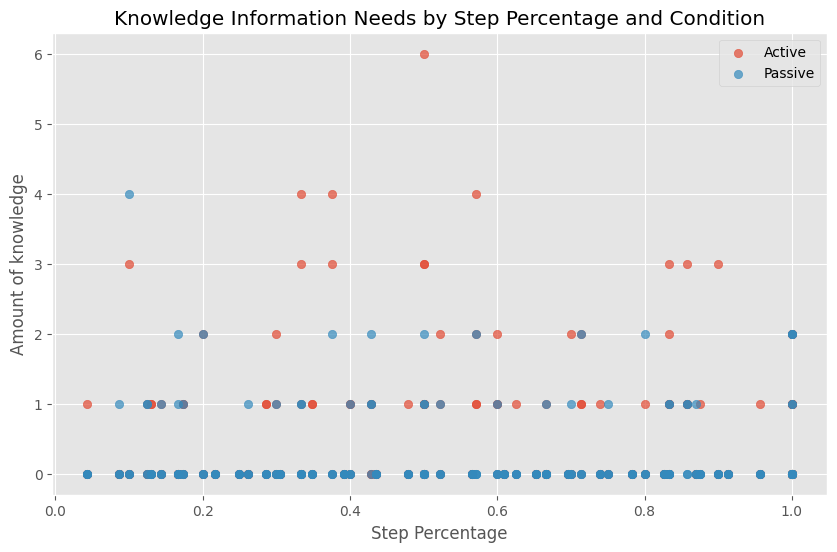

In [515]:
# create a figure with two boxplots
fig, ax = plt.subplots(figsize=(10, 6))
#ax.boxplot([grouped_1, grouped_2], labels=['Active', 'Passive'])
ax.scatter(active_condition['step_percentage'], active_condition['knowledge'], label='Active', alpha=.7)
ax.scatter(passive_condition['step_percentage'], passive_condition['knowledge'], label='Passive', alpha=.7)

# set the x- and y-axis labels
ax.set_xlabel('Step Percentage')
ax.set_ylabel('Amount of knowledge')

# set the title of the plot
ax.set_title('Knowledge Information Needs by Step Percentage and Condition')
ax.legend()
# show the plot
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


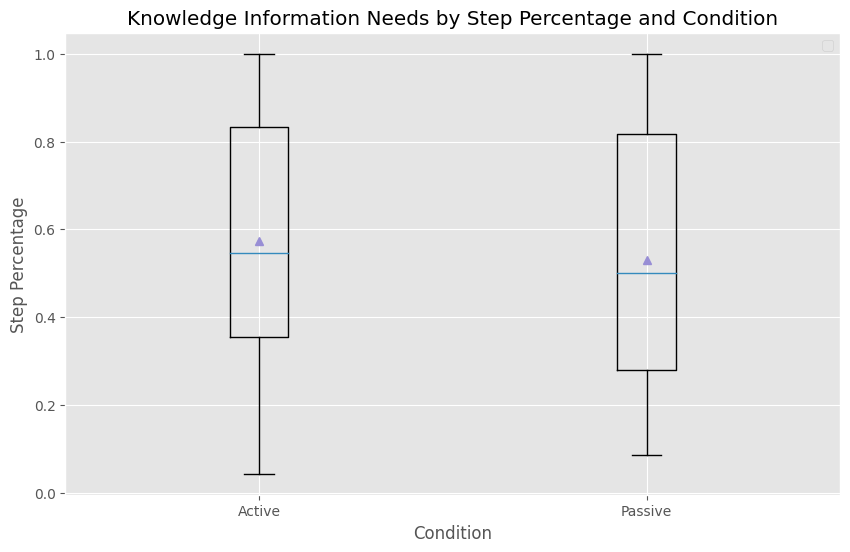

In [513]:
# create a figure with two boxplots
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot([active_knowledge_steps['step_percentage'], passive_knowledge_steps['step_percentage']],
           labels=['Active', 'Passive'],
           showmeans=True,
          )

# set the x- and y-axis labels
ax.set_xlabel('Condition')
ax.set_ylabel('Step Percentage')

# set the title of the plot
ax.set_title('Knowledge Information Needs by Step Percentage and Condition')
ax.legend()
# show the plot
plt.show()

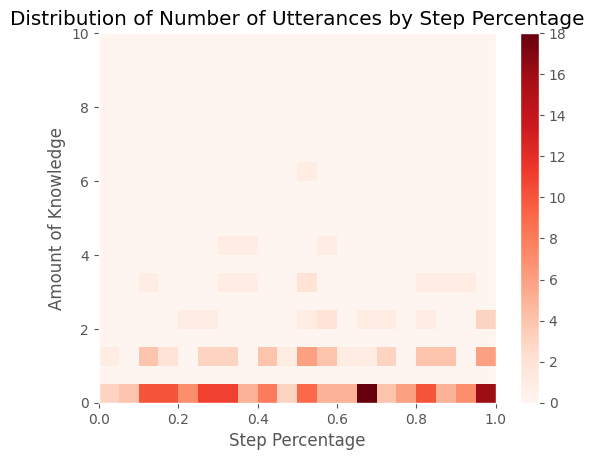

In [586]:
# create 2D histogram
plt.hist2d(active_condition['step_percentage'], active_condition['knowledge'], 
           bins=20, cmap='Reds', range=[[0, 1], [0, 10]])

# set x-axis label
plt.xlabel('Step Percentage')

# set y-axis label
plt.ylabel('Amount of Knowledge')

# set plot title
plt.title('Distribution of Number of Utterances by Step Percentage')

# add colorbar
plt.colorbar()

# show plot
plt.show()

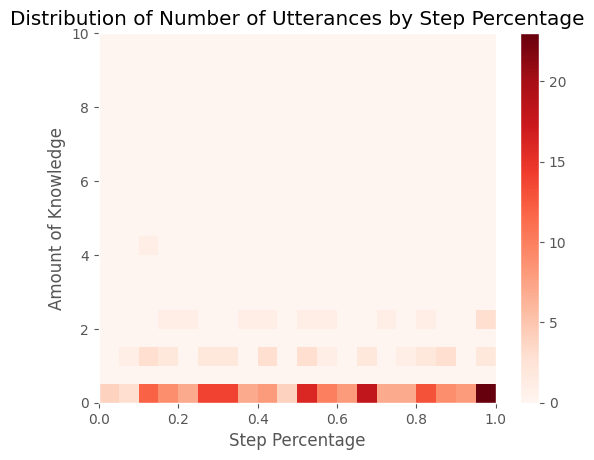

In [589]:
# create 2D histogram
plt.hist2d(passive_condition['step_percentage'], passive_condition['knowledge'], 
           bins=20, cmap='Reds', range=[[0, 1], [0, 10]])

# set x-axis label
plt.xlabel('Step Percentage')

# set y-axis label
plt.ylabel('Amount of Knowledge')

# set plot title
plt.title('Distribution of Number of Utterances by Step Percentage')

# add colorbar
plt.colorbar()

# show plot
plt.show()

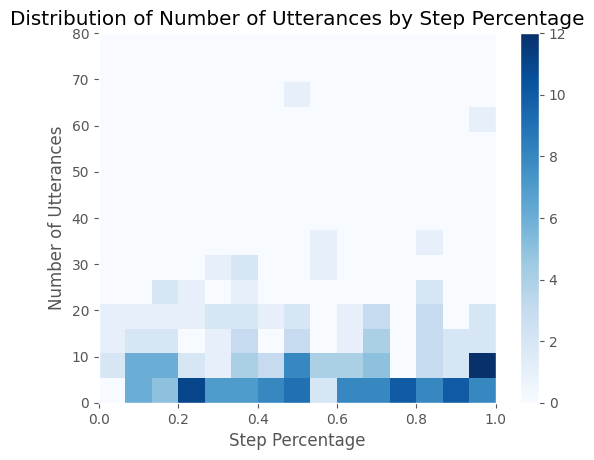

In [525]:
# create 2D histogram
plt.hist2d(active_condition['step_percentage'], active_condition['n_utterances'], 
           bins=15, cmap='Blues', range=[[0, 1], [0, 80]])

# set x-axis label
plt.xlabel('Step Percentage')

# set y-axis label
plt.ylabel('Number of Utterances')

# set plot title
plt.title('Distribution of Number of Utterances by Step Percentage')

# add colorbar
plt.colorbar()

# show plot
plt.show()

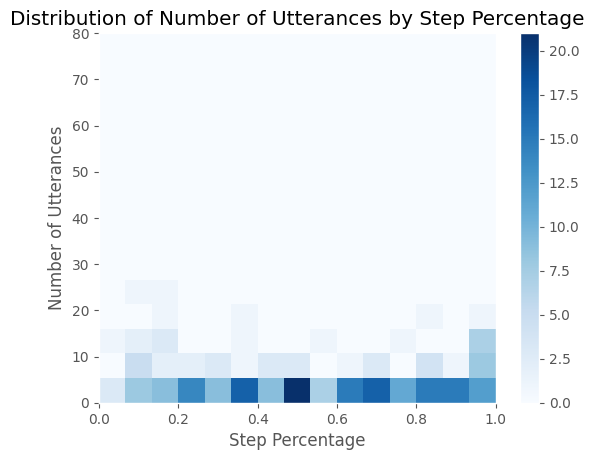

In [526]:
# create 2D histogram
plt.hist2d(passive_condition['step_percentage'], passive_condition['n_utterances'],
           bins=15, cmap='Blues', range=[[0, 1], [0, 80]])

# set x-axis label
plt.xlabel('Step Percentage')

# set y-axis label
plt.ylabel('Number of Utterances')

# set plot title
plt.title('Distribution of Number of Utterances by Step Percentage')

# add colorbar
plt.colorbar()

# show plot
plt.show()

In [478]:
active_knowledge_steps['step_percentage'].mean(), passive_knowledge_steps['step_percentage'].mean()

(0.5728874593315587, 0.5294858523119392)

In [450]:
condition_1[condition_1['knowledge']==0].describe()

,recipe_id,step_n,n_agent_utterances,n_user_utterances,knowledge,amount,cooking_technique,equipment,ingredient,meal,...,time,misc,total_images_sent,total_sources_used,wikipedia,seriousEats,stackExchangeCooking,excel,step_n_max,step_percentage
count,157.000000,157.000000,157.000000,157.000000,157.0,157.000000,157.000000,157.000000,157.000000,157.000000,...,157.000000,157.0,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,1402.146497,8.089172,2.598726,2.751592,0.0,0.038217,0.082803,0.070064,0.242038,0.006369,...,0.050955,0.0,0.127389,1.019108,0.140127,0.057325,0.044586,0.777070,15.235669,0.529604
std,938.993664,6.410504,2.958820,2.338792,0.0,0.192332,0.319490,0.302016,0.603423,0.079809,...,0.272599,0.0,0.370829,1.478354,0.593324,0.427306,0.207053,1.308741,7.834130,0.292889
min,120.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.043478
25%,419.000000,3.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.260870
50%,2180.000000,6.000000,2.000000,2.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.500000
75%,2180.000000,13.000000,4.000000,4.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,23.000000,0.782609
max,2331.000000,23.000000,13.000000,13.000000,0.0,1.000000,2.000000,2.000000,3.000000,1.000000,...,2.000000,0.0,2.000000,6.000000,4.000000,5.000000,1.000000,6.000000,23.000000,1.000000


In [453]:
condition_1[['knowledge', 'step_percentage']]


,knowledge,step_percentage
0,0,0.125000
1,0,0.250000
2,0,0.375000
3,6,0.500000
4,0,0.125000
...,...,...
370,0,0.826087
371,0,0.869565
372,0,0.913043
373,0,0.956522


<AxesSubplot: xlabel='step_percentage'>

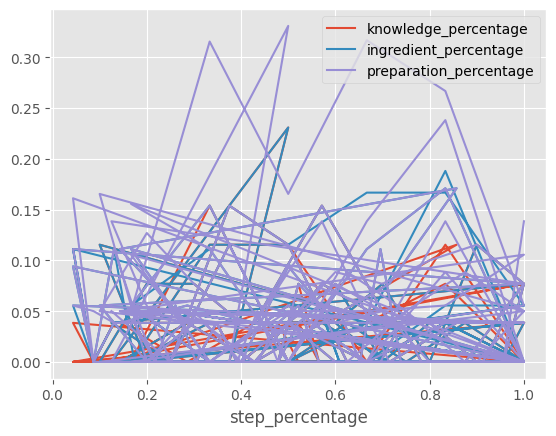

In [373]:
all_active_df.plot.line(x='step_percentage', y=['knowledge_percentage', 'ingredient_percentage', 'preparation_percentage'], stacked=True)



In [315]:
df = df[(df['recipe_id']==158) & (df['conv_id']=='8nJXjVjBTQ') | (df['conv_id']=='coe2XtNapn')]
#filtered_data.groupby('conv_id').sum()[['knowledge', 'amount', 'cooking_technique', 'equipment', 'ingredient', 'meal', 'preparation', 'recipe', 'temperature', 'time', 'misc']].sum(axis=1)
df

,conv_id,condition,recipe_id,step_n,step_text,n_agent_utterances,n_user_utterances,knowledge,amount,cooking_technique,...,recipe,temperature,time,misc,total_images_sent,total_sources_used,wikipedia,seriousEats,stackExchangeCooking,excel
20,8nJXjVjBTQ,active,158,0,2 medium cloves garlic 2 tablespoons (30g) pin...,2,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21,8nJXjVjBTQ,active,158,1,"Using a mortar and pestle, pound the garlic to...",14,13,3,0,0,...,0,0,0,0,2,3,0,0,0,3
22,8nJXjVjBTQ,active,158,2,Add pine nuts and continue to crush with pestl...,11,10,3,0,0,...,0,0,0,0,0,7,3,0,1,3
23,8nJXjVjBTQ,active,158,3,"Add basil leaves, a handful at a time, and pou...",8,7,0,0,0,...,0,0,0,0,0,4,2,0,0,2
24,8nJXjVjBTQ,active,158,4,"Add both cheeses, then slowly drizzle in olive...",11,7,0,1,0,...,0,0,0,0,0,5,0,0,0,5
25,8nJXjVjBTQ,active,158,5,"Pesto can be served with pasta right away, or ...",2,3,0,0,1,...,0,0,0,0,0,1,0,1,0,0
251,coe2XtNapn,passive,158,0,2 medium cloves garlic 2 tablespoons (30g) pin...,8,6,2,0,0,...,0,0,0,0,0,5,1,0,2,2
252,coe2XtNapn,passive,158,1,"Using a mortar and pestle, pound the garlic to...",2,2,0,0,0,...,0,0,0,0,0,1,0,0,0,1
253,coe2XtNapn,passive,158,2,Add pine nuts and continue to crush with pestl...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
254,coe2XtNapn,passive,158,3,"Add basil leaves, a handful at a time, and pou...",0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [332]:
active_df = df[df['condition']=='active']
passive_df = df[df['condition']=='passive']
active_df = active_df[['step_n','knowledge', 'amount', 'cooking_technique', 'equipment', 'ingredient', 'meal', 'preparation', 'recipe', 'temperature', 'time', 'misc']]
passive_df = passive_df[['step_n','knowledge', 'amount', 'cooking_technique', 'equipment', 'ingredient', 'meal', 'preparation', 'recipe', 'temperature', 'time', 'misc']]

active_df = active_df.loc[:, (active_df != 0).any(axis=0)]
passive_df = passive_df.loc[:, (passive_df != 0).any(axis=0)]

# Calculate the sum of each information need (knowledge to misc) for each group

#sums = grouped[['knowledge', 'amount', 'cooking_technique', 'equipment', 'ingredient', 'meal', 'preparation', 'recipe', 'temperature', 'time', 'misc']].sum()

# Create a stacked bar chart using the step_n as the x-axis and the sum of information needs as the y-axis
#sums.plot(kind='bar', stacked=True)

In [387]:
colors = {'knowledge': plt.get_cmap('Set1').colors[1], 'preparation': plt.get_cmap('Set1').colors[2], 
          'amount': plt.get_cmap('Set1').colors[5], 'cooking_technique': plt.get_cmap('Set1').colors[0],
          'equipment': plt.get_cmap('Set1').colors[6], 'ingredient': plt.get_cmap('Set1').colors[8]}


<AxesSubplot: xlabel='step_n'>

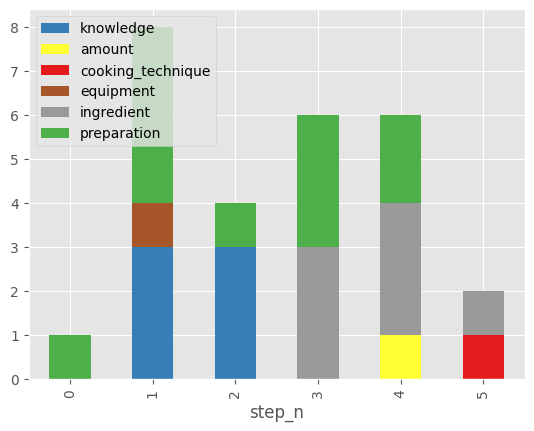

In [388]:
active_df.plot.bar(x='step_n', stacked=True, color=colors)
                  #color={"knowledge": "blue", "preparation": "green", "amount": "yellow",
                   #     "cooking_technique": "red", "equipment":"brown", "ingredient":"grey"})

<AxesSubplot: xlabel='step_n'>

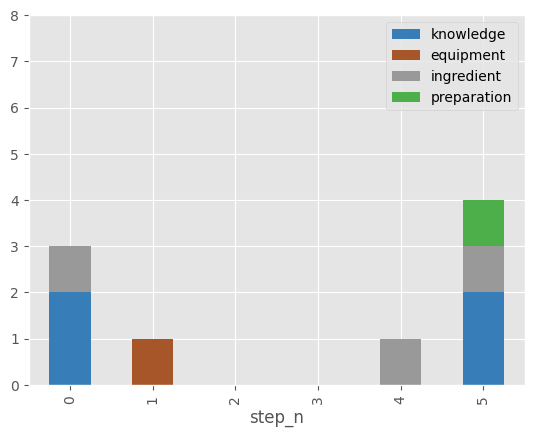

In [389]:
passive_df.plot.bar(x='step_n', stacked=True,color=colors, ylim=(0,8))

# 8. Intervention Type

In [948]:
intervention_type = pd.read_csv('data_nugget_analysis/woz_data_analysis_files/intervention_type_step.tsv',
                                sep='\t', index_col=False)


In [949]:
intervention_type

,conv_id,condition,step_n,nugget_count,intervention_type,question,answer,other,cooking_technique,equipment,ingredient,knowledge,meal,misc,preparation,recipe,temperature,time
0,o9UbVjHVrS,active,3,5,statement,4,9,7,1,1,0,1,0,0,1,0,0,0
1,o9UbVjHVrS,active,3,0,statement,1,2,3,1,0,0,0,0,0,0,0,0,0
2,o9UbVjHVrS,active,3,2,statement,4,4,6,0,0,0,2,0,0,0,0,0,0
3,o9UbVjHVrS,active,3,0,statement,1,4,1,0,0,0,1,0,0,0,0,0,0
4,o9UbVjHVrS,active,3,3,statement,1,3,2,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,a9780bf6,active,22,0,statement,0,1,2,0,0,0,0,0,0,0,0,0,0
116,a9780bf6,active,22,2,question,9,8,6,0,0,0,1,0,0,1,0,0,0
117,2424a396,active,4,4,statement,3,2,8,0,0,1,1,0,0,0,0,0,0
118,2424a396,active,5,1,question,3,3,5,0,0,0,1,0,0,0,0,0,1


In [950]:
intervention_type.groupby('intervention_type').sum()['nugget_count']

intervention_type
question      98
statement    128
Name: nugget_count, dtype: int64

In [952]:
intervention_type.groupby('intervention_type').sum()['question']

intervention_type
question     131
statement    142
Name: question, dtype: int64

In [951]:
intervention_type['intervention_type'].value_counts()

statement    71
question     49
Name: intervention_type, dtype: int64

In [960]:
statement_interventions = intervention_type[intervention_type['intervention_type']=="statement"]
question_interventions = intervention_type[intervention_type['intervention_type']=="question"]

In [962]:
stats.mannwhitneyu(statement_interventions['nugget_count'], question_interventions['nugget_count'])

MannwhitneyuResult(statistic=1644.0, pvalue=0.300507378098125)

In [980]:
statement_interventions['nugget_count'].describe()

count    71.000000
mean      1.802817
std       2.370170
min       0.000000
25%       0.000000
50%       1.000000
75%       3.000000
max      15.000000
Name: nugget_count, dtype: float64

In [981]:
question_interventions['nugget_count'].describe()

count    49.000000
mean      2.000000
std       2.466441
min       0.000000
25%       0.000000
50%       1.000000
75%       3.000000
max      11.000000
Name: nugget_count, dtype: float64

-> führt das zu anderen fragen?

In [965]:
stats.mannwhitneyu(statement_interventions['question'], question_interventions['question'])

MannwhitneyuResult(statistic=1275.0, pvalue=0.0056709602716702445)

In [967]:
print(f"Avg. # of questions following statements: {statement_interventions['question'].mean()}")
print(f"Avg. # of questions following questions: {question_interventions['question'].mean()}")

Avg. # of questions following statements: 2.0
Avg. # of questions following questions: 2.673469387755102


In [979]:
question_interventions['question'].describe()

count    49.000000
mean      2.673469
std       1.700340
min       0.000000
25%       2.000000
50%       2.000000
75%       4.000000
max       9.000000
Name: question, dtype: float64

In [982]:
statement_interventions['question'].describe()

count    71.000000
mean      2.000000
std       1.796823
min       0.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       8.000000
Name: question, dtype: float64

In [968]:
print(stats.mannwhitneyu(statement_interventions['answer'], question_interventions['answer']))
print(f"Avg. # of answers following statements: {statement_interventions['answer'].mean()}")
print(f"Avg. # of answers following questions: {question_interventions['answer'].mean()}")

MannwhitneyuResult(statistic=1639.5, pvalue=0.2952562996046189)
Avg. # of answers following statements: 3.0
Avg. # of answers following questions: 3.2448979591836733


<Figure size 2000x1000 with 0 Axes>

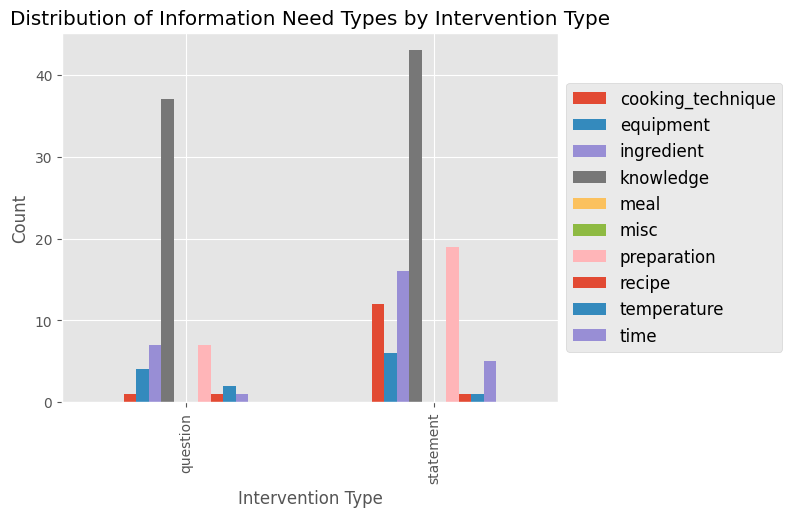

In [985]:
# group the data frame based on intervention_type column
groups = intervention_type.groupby('intervention_type')

# create a new data frame that counts the occurrences of each information need type for each intervention type
counts_df = groups[['cooking_technique', 'equipment', 'ingredient', 'knowledge', 'meal', 'misc', 'preparation', 'recipe', 'temperature', 'time']].sum()
fig = plt.figure(figsize=(20, 10))

# create a stacked bar chart that shows the distribution of each information need type within each intervention type
counts_df.plot(kind='bar')

# add labels and legend to the chart
plt.title('Distribution of Information Need Types by Intervention Type')
plt.xlabel('Intervention Type')
plt.ylabel('Count')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=12)

# show the chart
plt.show()

In [977]:
counts_df

,cooking_technique,equipment,ingredient,knowledge,meal,misc,preparation,recipe,temperature,time,total
intervention_type,,,,,,,,,,,
question,1,4,7,37,0,0,7,1,2,1,120
statement,12,6,16,43,0,0,19,1,1,5,206


In [973]:
from scipy.stats import fisher_exact


In [976]:
# perform Fisher's exact test
counts_df['total'] = counts_df.sum(axis=1)

# perform Fisher's exact test
p_values = []
for column in counts_df.columns[:-1]: # exclude the 'total' column
    contingency_table = counts_df[[column, 'total']].values
    oddsratio, p_value = fisher_exact(contingency_table)
    p_values.append({column: p_value})

# print the p-values for each information need type
print(p_values)

[{'cooking_technique': 0.037251965453243246}, {'equipment': 1.0}, {'ingredient': 0.6563375169624749}, {'knowledge': 0.12600753414683413}, {'meal': 1.0}, {'misc': 1.0}, {'preparation': 0.3979614692289885}, {'recipe': 1.0}, {'temperature': 0.5577160731034414}, {'time': 0.4220638901687058}]
